<a href="https://colab.research.google.com/github/ingrid1017/RedNeuronalMulticapa/blob/main/Multicapa_en_PyTorch1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Paso 1: Importar las bibliotecas necesarias
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [2]:
# Paso 2: Cargar y preprocesar el dataset CIFAR-10
# Carga el conjunto de datos CIFAR-10 y lo divide en entrenamiento y prueba
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

# Normalizar los valores de los píxeles de [0, 255] a [0, 1]
x_train, x_test = x_train / 255.0, x_test / 255.0

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [3]:
# Paso 3: Definir la arquitectura de la red neuronal convolucional (CNN)
model = models.Sequential()

# Primera capa convolucional con 32 filtros y un kernel de 3x3, activación ReLU
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))

# Capa de pooling
model.add(layers.MaxPooling2D((2, 2)))

# Segunda capa convolucional con 64 filtros y un kernel de 3x3, activación ReLU
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Aplana la salida de las capas convolucionales
model.add(layers.Flatten())

# Capa completamente conectada (densa) con 64 neuronas, activación ReLU
model.add(layers.Dense(64, activation='relu'))

# Capa de salida con 10 neuronas (una por cada clase en CIFAR-10), activación softmax
model.add(layers.Dense(10, activation='softmax'))



/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
# Paso 4: Compilar el modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [5]:
# Paso 5: Entrenar el modelo
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))



Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 72s 45ms/step - accuracy: 0.3874 - loss: 1.6884 - val_accuracy: 0.5535 - val_loss: 1.2631
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 44ms/step - accuracy: 0.5984 - loss: 1.1447 - val_accuracy: 0.6199 - val_loss: 1.0849
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 43ms/step - accuracy: 0.6562 - loss: 0.9903 - val_accuracy: 0.6593 - val_loss: 0.9847
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 43ms/step - accuracy: 0.6882 - loss: 0.8931 - val_accuracy: 0.6794 - val_loss: 0.9298
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 67s 43ms/step - accuracy: 0.7150 - loss: 0.8187 - val_accuracy: 0.6777 - val_loss: 0.9341
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 43ms/step - accuracy: 0.7370 - loss: 0.7591 - val_accuracy: 0.6920 - val_loss: 0.9058
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 69s 44ms/step - accuracy: 0.7550 - loss: 0.7125 - val_accuracy: 0.6984 - val_loss: 0.8957
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 43ms/step - accuracy: 0.7705 -

In [6]:
# Paso 6: Evaluar el modelo
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'\nTest accuracy: {test_acc}')


313/313 - 3s - 10ms/step - accuracy: 0.7029 - loss: 0.9206

Test accuracy: 0.7028999924659729


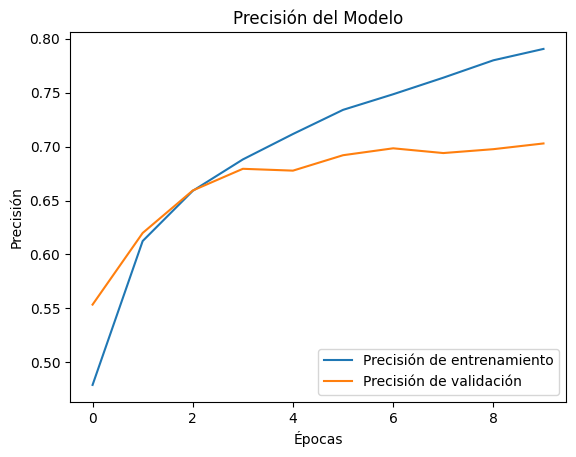

In [7]:
# Paso 7: Graficar el historial de precisión y pérdida
plt.plot(history.history['accuracy'], label='Precisión de entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión de validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend(loc='lower right')
plt.title('Precisión del Modelo')
plt.show()

